# 주유소 데이터 수집

### 필요한 모듈 가져오기

In [9]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm_notebook
import seaborn as sns
import googlemaps
from tqdm import tqdm
import numpy as np


### 구글 드라이브 실행

In [13]:
driver=webdriver.Chrome('../driver/chromedriver.exe')
driver.get('https://www.opinet.co.kr/searRgSelect.do')
time.sleep(4)

### 데이터 웹 크롤링

In [14]:
searchRegion=driver.find_element_by_class_name('gnbTopa')
ActionChains(driver).move_to_element(searchRegion).perform()
selectRegion=driver.find_element_by_xpath('//*[@id="header"]/div/ul/li[1]/ul/li[1]/a')
selectRegion.click()

In [15]:
sido_list_raw=driver.find_element_by_id('SIDO_NM0')
sido_list=driver.find_elements_by_tag_name('option')
sido_names=[option.get_attribute('value') for option in sido_list]
sido_names.remove('')
sido_list_raw.send_keys(sido_names[0])
time.sleep(2)


In [16]:
gu_list_raw=driver.find_element_by_id('SIGUNGU_NM0')
gu_list=gu_list_raw.find_elements_by_tag_name('option')
gu_names=[option.get_attribute('value') for option in gu_list]   
gu_names.remove('')
time.sleep(3)

In [17]:
driver.find_element_by_id('CWSH_YN').click()
driver.find_element_by_id('MAINT_YN').click()
driver.find_element_by_id('CVS_YN').click()
driver.find_element_by_id('SEL24_YN').click()
time.sleep(2)

### 데이터 정리하여 수집

In [18]:
gasstation_data=[]
for gu in tqdm_notebook(gu_names):
    element=driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)

    gasstationCode=driver.page_source
    bs=BeautifulSoup(gasstationCode,'lxml')
    gasstation1=bs.find('tbody',id='body1')
    gasstation_raw_data=gasstation1.find_all('tr')
    for num1 in tqdm_notebook(gasstation_raw_data):
        station_data=num1.find('a')['href'].split("','")
        gasstation_data.append({
            '주유소명' : station_data[22],
            '주소' : station_data[25],
            '브랜드': station_data[23],
            '휘발유 가격': int(station_data[2]),
            '경유 가격': int(station_data[3]),
            '셀프 여부':station_data[19],
            '세차장 여부':station_data[26],
            '충전소 여부':station_data[-2],
            '경정비 여부':station_data[27],
            '편의점 여부':station_data[28],
            '24시간 운영 여부':station_data[20],
            '구':station_data[25].split(' ')[1],
        })
        time.sleep(1)

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_14880\2617608859.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_14880\2617608859.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for num1 in tqdm_notebook(gasstation_raw_data):


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [19]:
driver.close()

### 데이터 프레임으로 정리

In [20]:
gasstation_last_data=pd.DataFrame(gasstation_data)

In [21]:
gasstation_last_data.head(7)

,주유소명,주소,브랜드,휘발유 가격,경유 가격,셀프 여부,세차장 여부,충전소 여부,경정비 여부,편의점 여부,24시간 운영 여부,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1648,1519,Y,Y,N,N,N,N,강남구
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1677,1539,Y,Y,N,N,N,N,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1697,1559,Y,Y,N,N,N,N,강남구
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1697,1559,Y,Y,N,N,N,N,강남구
4,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,1719,1599,Y,Y,N,Y,N,N,강남구
5,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,1726,1604,Y,Y,N,Y,N,Y,강남구
6,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,1729,1614,N,Y,N,Y,N,N,강남구


### 경도 위도 추가하기

In [24]:
gmaps_key='...'
gmaps=googlemaps.Client(key=gmaps_key)

In [25]:
for idx, row in tqdm_notebook(gasstation_last_data.iterrows()):
    tmp=gmaps.geocode(row['주소'], language='ko')
    lat=tmp[0].get('geometry')['location']['lat']
    lng=tmp[0].get('geometry')['location']['lng']
    gasstation_last_data.loc[idx, '위도']=lat
    gasstation_last_data.loc[idx, '경도']=lng


C:\Users\Ssoony\AppData\Local\Temp\ipykernel_14880\593504756.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for idx, row in tqdm_notebook(gasstation_last_data.iterrows()):


0it [00:00, ?it/s]

In [445]:
gasstation_last_data.rename(
    columns={
        '주유소명' : 'station_name',
        '주소' : 'adress',
        '브랜드' : 'brand',
        '휘발유 가격' : 'gasolin_price',
        '경유 가격' : 'diesel_price',
        '셀프 여부' : 'self_YN',
        '세차장 여부' : 'wash_YN',
        '충전소 여부' : 'LPG_YN',
        '경정비 여부' : 'repair_YN',
        '편의점 여부' : 'store_YN',
        '24시간 운영 여부' : '24hour_YN',
        '구':'gu',
        '위도':'lat',
        '경도':'lng',
    },inplace=True
)

In [446]:
gasstation_last_data.head()

,station_name,adress,brand,gasolin_price,diesel_price,self_YN,wash_YN,LPG_YN,repair_YN,store_YN,24hour_YN,gu,lat,lng
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1580,1789,Y,Y,N,N,N,N,강남구,37.467210,127.118713
1,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),SK에너지,1587,1787,Y,Y,N,N,N,N,강남구,37.483993,127.094978
2,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,1590,1799,Y,Y,N,N,N,N,강남구,37.466478,127.119039
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1597,1799,Y,Y,N,N,N,N,강남구,37.474940,127.106852
4,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1598,1799,Y,Y,N,N,N,N,강남구,37.483532,127.103980


---

# 셀프 주유소에서 휘발유와 경유의 가격이 더 저렴한가?

In [26]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [28]:
gasstation_last_data.head()

,주유소명,주소,브랜드,휘발유 가격,경유 가격,셀프 여부,세차장 여부,충전소 여부,경정비 여부,편의점 여부,24시간 운영 여부,구,위도,경도
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,1648,1519,Y,Y,N,N,N,N,강남구,37.467157,127.118708
1,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,1677,1539,Y,Y,N,N,N,N,강남구,37.466567,127.119080
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,1697,1559,Y,Y,N,N,N,N,강남구,37.474993,127.106887
3,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,1697,1559,Y,Y,N,N,N,N,강남구,37.483400,127.104046
4,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,1719,1599,Y,Y,N,Y,N,N,강남구,37.485462,127.043218


## 평균과 표준편차 계산하기

In [160]:
gasdata_mean=gasstation_last_data.groupby(['셀프 여부']).mean()

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_14880\932207173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gasdata_mean=gasstation_last_data.groupby(['셀프 여부']).mean()


In [161]:
gasdata_std=gasstation_last_data.groupby(['셀프 여부']).std()

C:\Users\Ssoony\AppData\Local\Temp\ipykernel_14880\3054584804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gasdata_std=gasstation_last_data.groupby(['셀프 여부']).std()


In [46]:
gasdata_std

,휘발유 가격,경유 가격,위도,경도
셀프 여부,,,,
N,249.035256,259.497307,0.044238,0.083923
Y,63.868898,75.622915,0.055817,0.096699


In [44]:
gasdata_mean

,휘발유 가격,경유 가격,위도,경도
셀프 여부,,,,
N,1840.235772,1707.000000,37.534783,126.985933
Y,1666.691304,1527.452174,37.548457,126.990707


## 확률밀도함수 그리기

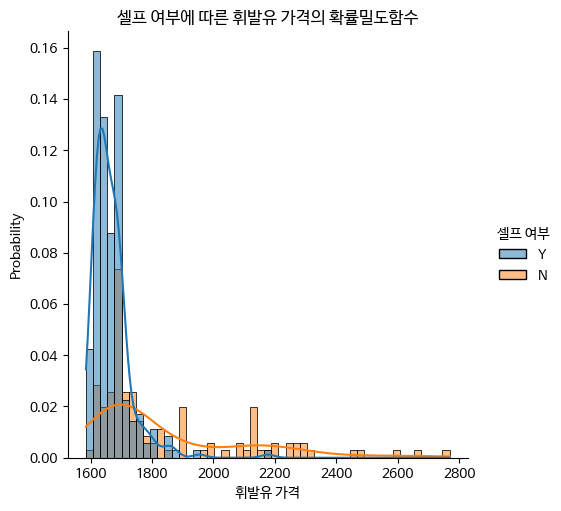

In [157]:
sns.displot(gasstation_last_data, x="휘발유 가격", hue="셀프 여부", stat="probability",kde=True)
plt.title('셀프 여부에 따른 휘발유 가격의 확률밀도함수')
plt.show()

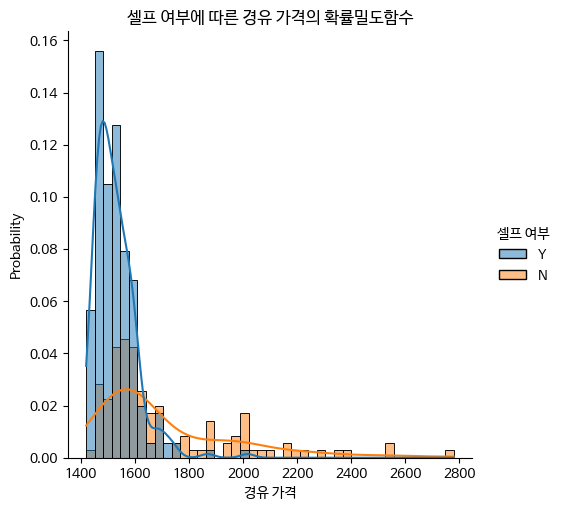

In [159]:
sns.displot(gasstation_last_data, x="경유 가격", hue="셀프 여부", stat="probability",kde=True)
plt.title('셀프 여부에 따른 경유 가격의 확률밀도함수')
plt.show()

## t-test 하기

### 휘발유 가격 비교하기

#### 표본 개수 확인하기

In [162]:
import numpy as np
import scipy as sp
from matplotlib import rc

In [238]:
x1 = gasstation_last_data.loc[gasstation_last_data['셀프 여부']=='Y','휘발유 가격']
x2 = gasstation_last_data.loc[gasstation_last_data['셀프 여부']=='N','휘발유 가격']
len(x1), len(x2)

(230, 123)

#### 등분산성 검정

In [209]:
from scipy.stats import levene
stat ,p = levene(x1,x2, center = 'mean')
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else : 
    print('귀무가설을 기각한다')

검정통계량 : 196.19810213571557, p-value : 1.0152028246072891e-35
귀무가설을 기각한다


#### Welcht-test 하기

In [232]:
from scipy import stats
stat, p = stats.ttest_ind(x1,x2, alternative='less', equal_var=False)
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else :
    print('귀무가설을 기각한다')

검정통계량 : -7.5961862065264745, p-value : 2.5955650009809643e-12
귀무가설을 기각한다


#### mann Whitney U test 하기

In [235]:
from scipy import stats
stat, p = stats.mannwhitneyu(x1,x2, alternative='less')
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else : 
    print('귀무가설을 기각한다')

검정통계량 : 5810.5, p-value : 3.601330860051542e-20
귀무가설을 기각한다


### 경유 가격 비교하기

In [243]:
y1 = gasstation_last_data.loc[gasstation_last_data['셀프 여부']=='Y','경유 가격']
y2 = gasstation_last_data.loc[gasstation_last_data['셀프 여부']=='N','경유 가격']
len(y1), len(y2)

(230, 123)

#### 등분산성 검정

In [244]:
from scipy.stats import levene
stat ,p = levene(y1,y2, center = 'mean')
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else : 
    print('귀무가설을 기각한다')

검정통계량 : 140.9094893669016, p-value : 1.4893035246354747e-27
귀무가설을 기각한다


#### Welcht-test 하기

In [245]:
from scipy import stats
stat, p = stats.ttest_ind(y1,y2, alternative='less', equal_var=False)
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else :
    print('귀무가설을 기각한다')

검정통계량 : -7.505075637428561, p-value : 3.921077563186161e-12
귀무가설을 기각한다


#### mann Whitney U test 하기

In [246]:
from scipy import stats
stat, p = stats.mannwhitneyu(y1,y2, alternative='less')
print(f'검정통계량 : {stat}, p-value : {p}')
if p >= 0.05:
    print('귀무가설을 기각할 수 없다')
else : 
    print('귀무가설을 기각한다')

검정통계량 : 6242.5, p-value : 2.5558777502111225e-18
귀무가설을 기각한다


---